In [74]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.utils import Sequence
import os
import time
import datetime
import pandas as pd
from utils import sadness
from sklearn.utils import shuffle
from sklearn import preprocessing
from matplotlib import pyplot as plt

%matplotlib inline


[WinError 2] The system cannot find the file specified: 'Data'
c:\Users\runze\OneDrive\Desktop\MTG-Investor-s-Grail\Data


In [42]:
#creating uuid dictionary
card_data = pd.read_csv("data.csv")
uuid2vec = {vec[1]: vec[3:] for vec in card_data.itertuples()}
print(list(uuid2vec.keys())[0], "maps to", list(uuid2vec.values())[0])


047d5499-a21c-5f5c-9679-1599fcaf9815 maps to (1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0)


In [43]:
#creating uuid to card name dict
card_data_full = pd.read_csv("MTGJSON/cards.csv")
uuid2cardname = {vec[1]: vec[2] for vec in card_data_full[["scryfallId", "name"]].itertuples()}

c:\Users\runze\OneDrive\Desktop\MTG-Investor-s-Grail\MTGMemes\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (8,14,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
#creating uuid to scryfallid dict
uuid2scryfallid = {vec[1]: vec[2] for vec in card_data_full[["uuid", "scryfallId"]].itertuples()}

In [45]:
#creating uuid to release date
uuid2set = {vec[1]: vec[2] for vec in card_data.itertuples()}
set_data = pd.read_csv("MTGJSON/sets.csv")
set2date = {vec[1]: datetime.datetime.strptime(vec[2], '%Y-%m-%d') for vec in set_data[["code", "releaseDate"]].itertuples()}
uuid2date = {key:set2date[value] for key, val ue in uuid2set.items()}
print(len(uuid2set), len(uuid2date))

48290 48290


In [94]:
def convert_date(vec):
    try:
        date_price = [abs((uuid2date[vec[1]] - datetime.datetime.strptime(vec[2], '%m/%d/%Y')).days), vec[3]]
        return [vec[1]] + date_price
    except KeyError as err:
        try:
            return [np.nan for i in range(len(vec))]
        except:
            return [np.nan for i in range(len(vec))]
    return [np.nan for i in range(len(vec))]
price_data = pd.read_csv("MTGJSON/prices.csv")
price_data = price_data[price_data["type"] == "paper"]
price_data = price_data[["uuid", "date", "price"]]

uuids = set(list(np.reshape(price_data[['uuid']].to_numpy(), (price_data[['uuid']].to_numpy().shape[0]))))
print(len(uuids))

uuid  date  price
0    NaN   NaN    NaN
3    NaN   NaN    NaN
7    NaN   NaN    NaN
11   NaN   NaN    NaN
13   NaN   NaN    NaN
16   NaN   NaN    NaN
19   NaN   NaN    NaN
21   NaN   NaN    NaN
22   NaN   NaN    NaN
25   NaN   NaN    NaN
37632


In [97]:
price_data = pd.read_csv("MTGJSON/prices.csv")
price_data = price_data[price_data["type"] == "paper"][["uuid", "date", "price"]]
print(price_data.shape)
uuid_date_price = []
seq_dict = {}
counter = 0
for vec in price_data.itertuples():
    counter += 1
    try:
        date_price = [abs((uuid2date[vec[1]] - datetime.datetime.strptime(vec[2], '%m/%d/%Y')).days), vec[3]]
        uuid_date_price.append([vec[1]] + date_price)
        if date_price and vec[1] not in seq_dict:
            seq_dict[vec[1]] = [date_price]
        elif not date_price:
            continue
        else:
            seq_dict[vec[1]].append(date_price)
            
    except KeyError as err:
        try:
            print(uuid2cardname[vec[1]])
            
        except:
            print(vec[1])
            

uuid_date_price = np.asarray(uuid_date_price)
print(uuid_date_price.shape)
print(counter)

(38199, 3)
1669af17-d287-5094-b005-4b143441442f
212276a4-1a15-5aaa-b4ca-596031a0855e
485c633b-2d07-5a81-8260-dac5641e7a06
5fe54c0c-88aa-54ce-97eb-a3498752b4f3
635508d7-c193-58d5-8066-4e3bec3bc8ec
904f6bb9-c6b3-5ede-b970-a6e2d2843831
(38193, 3)
38199


, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

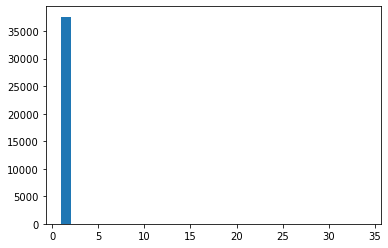

In [78]:
datasad = []
for each in seq_dict.values():
    datasad.append(len(each))
print(datasad)
print(plt.hist(datasad, bins=30))

In [ ]:
#processing data into sequencial data
#using card vectors as an input into every series

X = []

for each in seq_dict:
    




set_length = x_train.shape[0]
cv_idx = int(set_length * .6)
test_idx = int(set_length * .8)


x_cv = x_train[cv_idx:test_idx, :]
y_cv = y_train[cv_idx:test_idx, :]

x_test = x_train[test_idx:, :]
y_test = y_train[test_idx:, :]

x_train = x_train[:cv_idx, :]
y_train = y_train[:cv_idx, :]

print("Training: {}, Cross val: {}, Testing: {}".format(x_train.shape, x_cv.shape, x_test.shape))
print("y_vals Training: {}, Cross val: {}, Testing: {}".format(y_train.shape, y_cv.shape, y_test.shape))

In [ ]:
model = tf.keras.models.Sequential(
    tf.keras.layers.LSTM(1000, input_shape = (None, 2)),
    tf.keras.layers.Dense(2)
)
model.compile()